In [3]:
import os
import sys

In [4]:
sys.path.append(os.path.abspath("../.."))

In [5]:
from analysis.preprocessing import load_and_clean_microplastic_data, load_and_clean_macroplastic_data
from analysis.config import PROCESSED_DATA_FILES

In [6]:
df_micro = load_and_clean_microplastic_data()
df_micro

,Entity,Code,year,microplastics
0,Emissions growth to 2050,NaN,1950,0
1,Emissions growth to 2050,NaN,1951,0
2,Emissions growth to 2050,NaN,1952,0
3,Emissions growth to 2050,NaN,1953,0
4,Emissions growth to 2050,NaN,1954,100
...,...,...,...,...
298,Emissions stop in 2020,NaN,2046,1380100
299,Emissions stop in 2020,NaN,2047,1405000
300,Emissions stop in 2020,NaN,2048,1429400
301,Emissions stop in 2020,NaN,2049,1453500


In [7]:
df_macro = load_and_clean_macroplastic_data()
df_macro

,Entity,Code,year,macroplastics
0,Emissions growth to 2050,NaN,1950,0
1,Emissions growth to 2050,NaN,1951,400
2,Emissions growth to 2050,NaN,1952,600
3,Emissions growth to 2050,NaN,1953,1000
4,Emissions growth to 2050,NaN,1954,1300
...,...,...,...,...
298,Emissions stop in 2020,NaN,2046,827100
299,Emissions stop in 2020,NaN,2047,815000
300,Emissions stop in 2020,NaN,2048,802800
301,Emissions stop in 2020,NaN,2049,790700


In [8]:
df_macro.drop(columns="Code", inplace=True)
df_micro.drop(columns="Code", inplace=True)

In [9]:
df_platics = df_micro.merge(df_macro, on=['Entity', 'year'], how='inner', suffixes=('', '_macro'))
df_platics

,Entity,year,microplastics,macroplastics
0,Emissions growth to 2050,1950,0,0
1,Emissions growth to 2050,1951,0,400
2,Emissions growth to 2050,1952,0,600
3,Emissions growth to 2050,1953,0,1000
4,Emissions growth to 2050,1954,100,1300
...,...,...,...,...
298,Emissions stop in 2020,2046,1380100,827100
299,Emissions stop in 2020,2047,1405000,815000
300,Emissions stop in 2020,2048,1429400,802800
301,Emissions stop in 2020,2049,1453500,790700


In [10]:
df_platics.to_csv(PROCESSED_DATA_FILES['plastics'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")


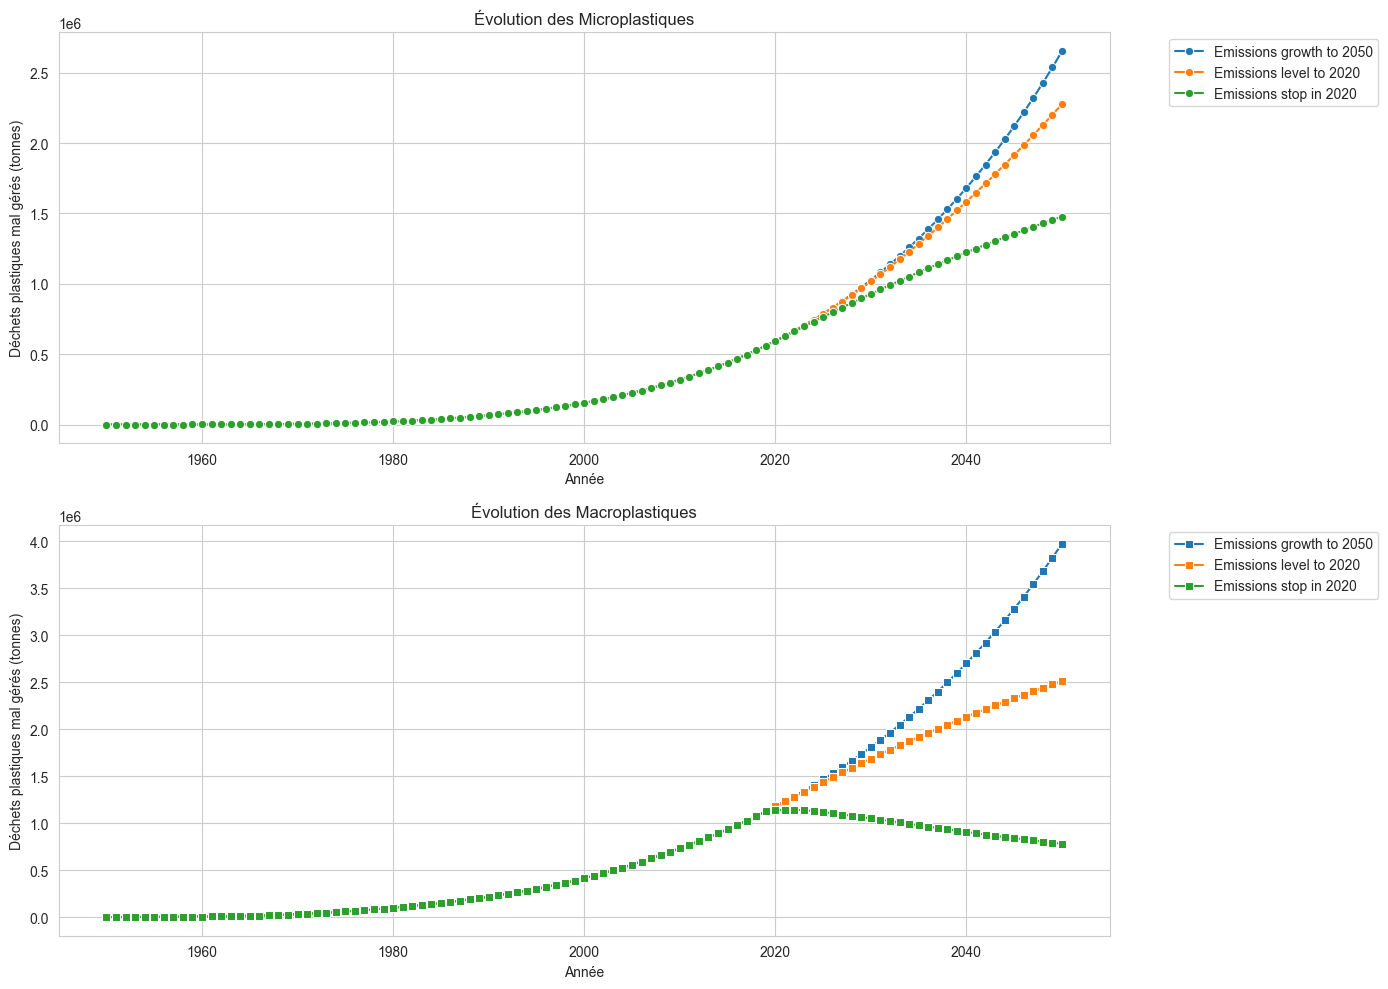

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Microplastiques
sns.lineplot(data=df_platics, x='year', y='microplastics',
             hue='Entity', ax=ax1, marker='o')
ax1.set_title('Évolution des Microplastiques')
ax1.set_xlabel('Année')
ax1.set_ylabel('Déchets plastiques mal gérés (tonnes)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Macroplastiques
sns.lineplot(data=df_platics, x='year', y='macroplastics',
             hue='Entity', ax=ax2, marker='s')
ax2.set_title('Évolution des Macroplastiques')
ax2.set_xlabel('Année')
ax2.set_ylabel('Déchets plastiques mal gérés (tonnes)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

